In [1]:
#pip install descartes

In [35]:
import pandas as pd
from numpy import *
import torch
import matplotlib.pyplot as plt
import geopandas as gpd

In [36]:
url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url_deths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
url_recovered = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
url_countries = "https://raw.githubusercontent.com/AnthonyEbert/COVID-19_ISO-3166/master/JohnsHopkins-to-A3.csv"
data_confirmed = pd.read_csv(url_confirmed)
data_deths = pd.read_csv(url_deths)
data_recovered = pd.read_csv(url_recovered)
data_countries = pd.read_csv(url_countries)

days=data_confirmed.shape[1]-4

print("matrix shape:" ,data_confirmed.shape)
#data_confirmed[data_confirmed['Country/Region']=='China']
#print(data_confirmed.iloc[:,0:2].values)
data_confirmed.head(5)

matrix shape: (273, 388)


Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  1/30/21  1/31/21  2/1/21  2/2/21  \
0        0        0        0        0  ...    55008    55023   55059   55121   
1        0        0        0        0  ...    77251    78127   78992   79934   
2        0        0        0        0  ...   107122   107339  107578  107841   
3        0        0        0        0  ...     9885     9937    9972   10017   
4        0        0        0        0  ...    19782    19796   19829   19900   

   2/3/21  2/4/21  2/5/21  2/6/21  2/7/21  2/8/21  
0   55174   55231   55265   55330   55335   55359  
1   80941   81993   83082   84212   85336   86289  
2  108116  108381  108629  108629  109088  109313  
3   10070   10137   10172   10206   10251   10275  
4   19937   19996   20030   20062   20086   20112  

[5 rows x 388 columns]

total confirmed:  2989.085 k
total deths:  62.295 k
total recovered:  150.376 k


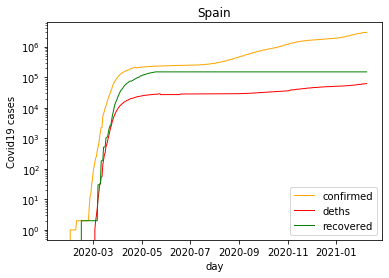

In [37]:
country='Spain'

confirmedC = data_confirmed.groupby("Country/Region").sum().drop(['Lat','Long'], axis=1).loc[country]
dethsC = data_deths.groupby("Country/Region").sum().drop(['Lat','Long'], axis=1).loc[country]
recoveredC = data_recovered.groupby("Country/Region").sum().drop(['Lat','Long'], axis=1).loc[country]

df=pd.DataFrame({'x':pd.date_range("01/22/20",periods=days),'yy1':confirmedC.values,'yy2':dethsC.values,'yy3':recoveredC.values})
# multiple line plot
plt.plot( 'x', 'yy1', data=df, marker='', color='orange', linewidth=1,label="confirmed")
plt.plot( 'x', 'yy2', data=df, marker='', color='red', linewidth=1,label="deths")
plt.plot( 'x', 'yy3', data=df, marker='', color='green', linewidth=1,label="recovered")
plt.legend()
plt.yscale("log")
plt.xlabel('day')
plt.ylabel('Covid19 cases')
plt.title(country)

print("total confirmed: ", confirmedC.iloc[days-1]/1000,'k')
print("total deths: ", dethsC.iloc[days-1]/1000,'k')
print("total recovered: ", recoveredC.iloc[days-1]/1000,'k')

Country/Region alpha3  \
0                         Fiji    FJI   
1  United Republic of Tanzania    TZA   
2               Western Sahara    SAH   
3                       Canada    CAN   
4     United States of America    USA   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

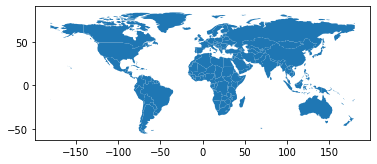

In [5]:
shapefile = 'ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
map_world = gpd.read_file(shapefile)[['ADMIN','ADM0_A3','geometry']]
#Rename columns.
map_world.columns = ['Country/Region','alpha3','geometry']
#gdf.head(5)

#print(map_world[map_world['ADMIN'] == 'Antarctica'])
#Drop row corresponding to 'Antarctica'
map_world0 = map_world.drop(map_world.index[159])
map_world0.plot()
map_world.head(5)

In [6]:
confirmedT=data_confirmed.groupby('Country/Region').sum().drop(['Lat','Long'], axis=1)
confirmedToday=confirmedT.iloc[:,days-1].reset_index()
confirmedToday.columns = ['Country/Region','today']
confirmedToday0=(confirmedToday.set_index('Country/Region')).join(data_countries.set_index('Country/Region'))
print(confirmedToday0.head(5))

                 today alpha3
Country/Region               
Afghanistan      55335    AFG
Albania          85336    ALB
Algeria         109088    DZA
Andorra          10251    AND
Angola           20086    AGO


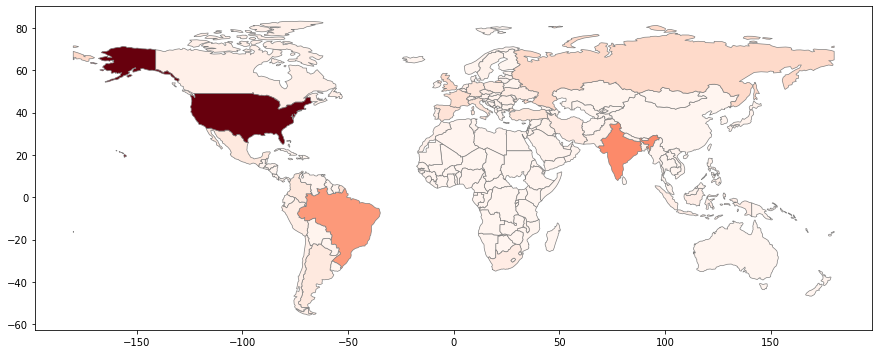

In [17]:
#Merge dataframes gdf and confirmedT.
merged = (map_world.set_index('alpha3')).join(confirmedToday0.set_index('alpha3'))
merged.head()

# set a variable that will call whatever column we want to visualise on the map
variable = 'today'
# set the range for the choropleth
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 10))

merged.plot(column=variable, cmap='Reds', linewidth=0.7, ax=ax, edgecolor='0.5')

In [38]:
# from https://towardsdatascience.com/how-to-make-a-gif-map-using-python-geopandas-and-matplotlib-cd8827cefbc8


i = 0
vmin, vmax = -250, 250

# start the for loop to create one map per year
for year in range(1,days):
    
    # create map, UDPATE: added plt.Normalize to keep the legend range the same for all maps
    fig = merged.plot(column=year, cmap='Blues', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax,
legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    
    # remove axis of chart
    fig.axis('off')
    
    # add a title
    fig.set_title('Violent crimes in London', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    
    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    filepath = os.path.join(output_path, only_year+'_violence.jpg')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)
    
# create an annotation for the year by grabbing the first 4 digits
    only_year = year[:4]
    # position the annotation to the bottom left
    fig.annotate(only_year,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)
    
    


NameError: name 'merged' is not defined

using random constants


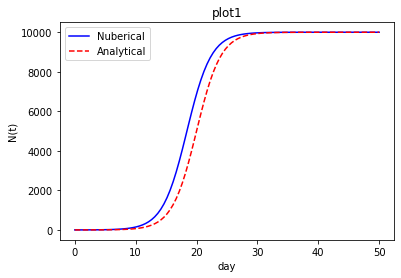

In [146]:
from numpy import *
from scipy.integrate import odeint
import matplotlib.pyplot as plt


tao0 = 2            #characteristic time of the pandemic growth
Nt= 10000           #total number of people who could be infected
t = linspace(0,50,100)  #time points


##### function that returns dN/dt eq.(1) ########
def dNdt(N,t):   #N: total number of infections
    dNdt = (1-N/Nt)*N/tao0
    return dNdt
# -> initial condition
N0 = 1
# -> solve ODE
N = odeint(dNdt,N0,t)
##################################################

##### function that returns df/dt eq.(3) ########
def dfdt(f,t):   
    tao0 = 2
    dfdt = f*(1-f)/tao0
    return dfdt
# -> initial condition
C1=10
f0 = (1+exp(C1))**(-1)
# -> solve ODE
f = odeint(dfdt,f0,t)
################################################

##### function that returns f_an eq.(6) #######
def f_an(x,f0): 
    f_an = f0*exp(x)/(f0*exp(x)+1)
    return f_ann
##################################################

##### function that returns N_an eq.(7) ########
def N_an(x,f0=f0,Nt=Nt):
    N_an = Nt*f0*exp(x)/(f0*exp(x)+1)
    return N_an
##################################################

x=t/tao0


fig = plt.subplots()
plt.plot(t, N, '-b', label='Nuberical')
plt.plot(t, N_an(x), '--r', label='Analytical')
#plt.axis('equal')
leg = plt.legend()
plt.xlabel('day')
plt.ylabel('N(t)')
plt.title("plot1")



print("using random constants")


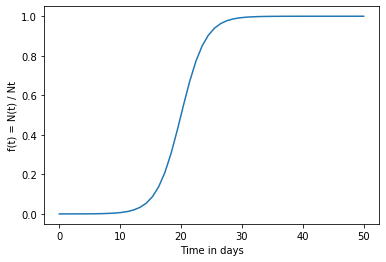

In [86]:

    
    
# time points

# solve ODE
f = odeint(dfdt,f0,t)

# plot results
plt.plot(t,f)
plt.xlabel('Time in days')
plt.ylabel('f(t) = N(t) / Nt')
plt.show()

In [65]:
def model_Nt(t, Nt=1000):
    return Nt
    

In [68]:
def tao(t, alpha=0,tao0=1):
    tao= tao0+alpha*t
    return tao


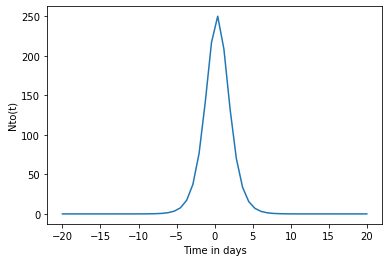

In [70]:
# function that returns dNto/dt
def model_DNi(t):   #N: total number of infections
    tao0 = 1
    f0 = 0.7
    DNi = (model_Nt(t)*f0*exp(t/model_tao(t)))/(model_tao(t)*(1+f0*exp(t/model_tao(t)))**2)
    return DNi


# time points
t = linspace(-20,20)

# solve ODE
Nto = model_DNi(t)

# plot results
plt.plot(t,Nto)
plt.xlabel('Time in days')
plt.ylabel('Nto(t)')
plt.show()